### CARS Modelling


In [1]:
# Importing all required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#Importing dataset
cars = pd.read_csv("CarPrice_Assignment.csv")

In [300]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

In [301]:
#cleaning data
cars.isnull().sum()
#No Nulls in data

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

### Data Preparation

In [3]:
#Seperating Company Name from Car Name
cars.CarName = cars.CarName.str.replace(' ',',')
cars.CarName = cars.CarName.str.replace('-',',')
cars['CompName'] = cars.CarName.str.split(',').str.get(0)  


In [4]:
cars.drop( ['CarName'], axis = 1,inplace = True )

In [5]:
cars.drop(['car_ID'],axis = 1,inplace = True)

In [6]:
len(cars.groupby("CompName"))

28

In [15]:
cars.groupby(['CompName']).CompName.max()

CompName
Nissan            Nissan
alfa                alfa
audi                audi
bmw                  bmw
buick              buick
chevrolet      chevrolet
dodge              dodge
honda              honda
isuzu              isuzu
jaguar            jaguar
maxda              maxda
mazda              mazda
mercury          mercury
mitsubishi    mitsubishi
nissan            nissan
peugeot          peugeot
plymouth        plymouth
porcshce        porcshce
porsche          porsche
renault          renault
saab                saab
subaru            subaru
toyota            toyota
toyouta          toyouta
vokswagen      vokswagen
volkswagen    volkswagen
volvo              volvo
vw                    vw
Name: CompName, dtype: object

In [307]:
#porsche spelling name 
cars.CompName.str.replace('porcshce','porsche')
cars.CompName.str.replace('nissan','Nissan')
cars.CompName.str.replace('toyouta','toyota')
cars.CompName.str.replace(''

0            alfa
1            alfa
2            alfa
3            audi
4            audi
5            audi
6            audi
7            audi
8            audi
9            audi
10            bmw
11            bmw
12            bmw
13            bmw
14            bmw
15            bmw
16            bmw
17            bmw
18      chevrolet
19      chevrolet
20      chevrolet
21          dodge
22          dodge
23          dodge
24          dodge
25          dodge
26          dodge
27          dodge
28          dodge
29          dodge
          ...    
175        toyota
176        toyota
177        toyota
178        toyota
179        toyota
180        toyota
181       toyouta
182     vokswagen
183    volkswagen
184    volkswagen
185    volkswagen
186    volkswagen
187    volkswagen
188    volkswagen
189            vw
190            vw
191    volkswagen
192    volkswagen
193    volkswagen
194         volvo
195         volvo
196         volvo
197         volvo
198         volvo
199       

In [308]:
# Defining the map function
varlist = ['doornumber','cylindernumber']
def binary_map(x):
    return x.map({'two': 2, "three": 3,'four': 4, "five": 5,"six": 6,'eight': 8, "twelve": 12})

# Applying the function to the housing list
cars[varlist] = cars[varlist].apply(binary_map)

In [309]:
#seperating numerical data from categorical data for plotting correlation
num_cols =  cars.select_dtypes(include=[np.number]).columns.tolist()
len(num_cols)

17

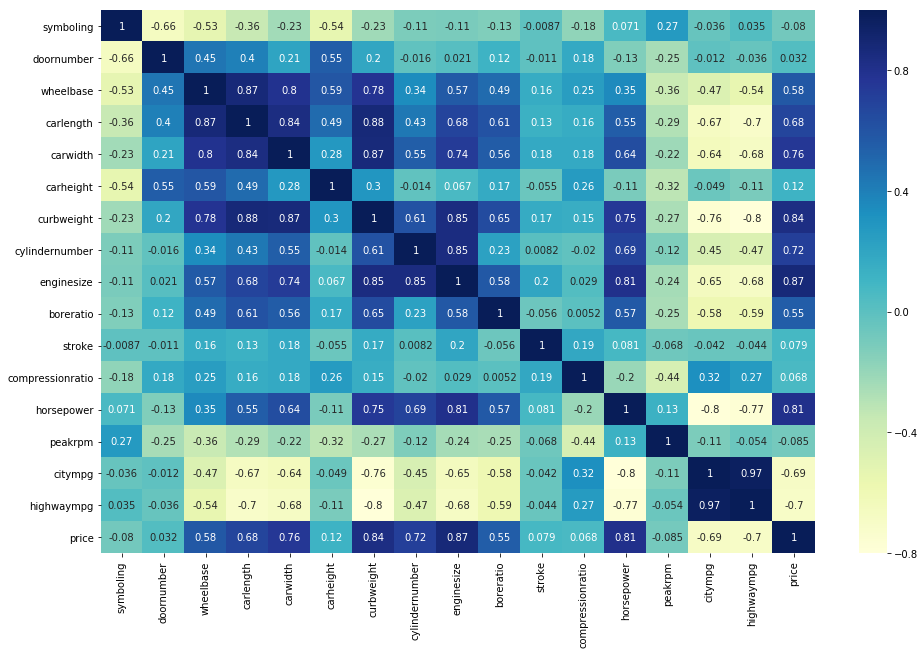

In [310]:
#Correlations of only numerical data
plt.figure(figsize = (16, 10))
sns.heatmap(cars[num_cols].corr(), annot = True, cmap="YlGnBu")
plt.show()

Most numerical data has positively correlation with Target variable price, But 
citympg,highwaympg have negative correlation with price
citympg and highwaympg are highly correlated so will make it as 1 feature

In [311]:
#categorical list
cat_cols = list(set(cars.columns) - set(num_cols))
print(len(cat_cols))

8


In [312]:
cat_cols

['carbody',
 'CompName',
 'enginelocation',
 'drivewheel',
 'fueltype',
 'fuelsystem',
 'aspiration',
 'enginetype']

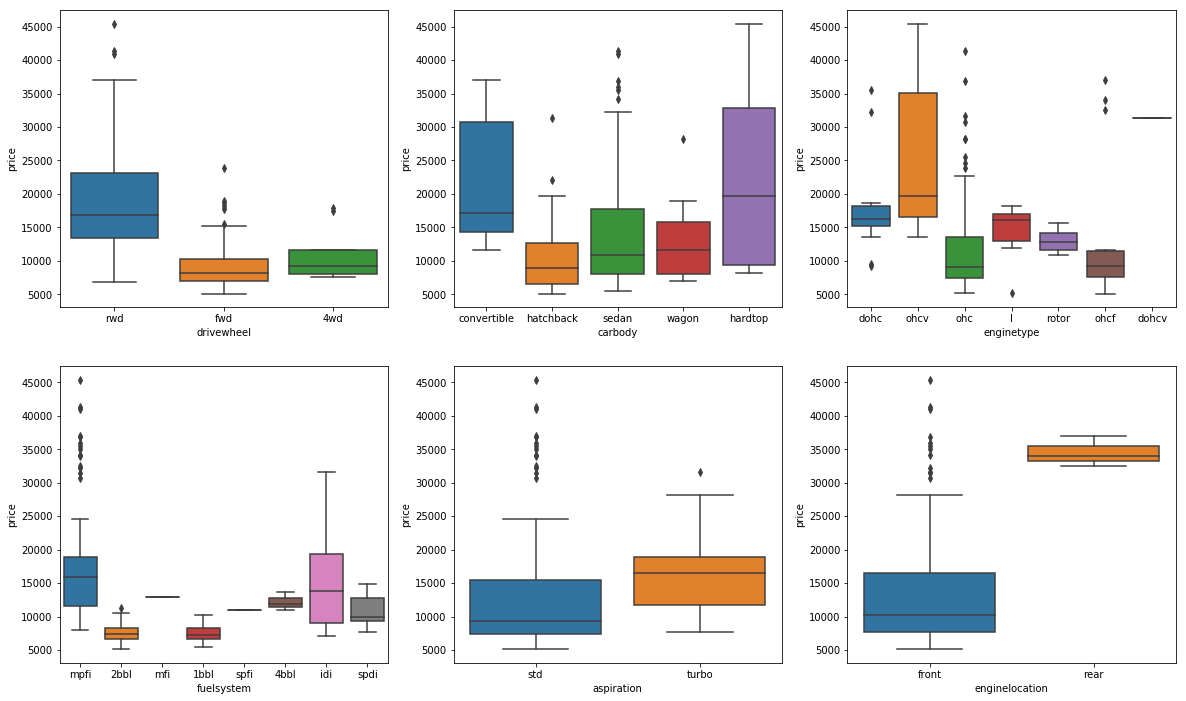

In [313]:
#plot catgorical variables
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'drivewheel', y = 'price', data = cars)
plt.subplot(2,3,2)
sns.boxplot(x = 'carbody', y = 'price', data = cars)
plt.subplot(2,3,3)
sns.boxplot(x = 'enginetype', y = 'price', data = cars)
plt.subplot(2,3,4)
sns.boxplot(x = 'fuelsystem', y = 'price', data = cars)
plt.subplot(2,3,5)
sns.boxplot(x = 'aspiration', y = 'price', data = cars)
plt.subplot(2,3,6)
sns.boxplot(x = 'enginelocation', y = 'price', data = cars)
plt.show()

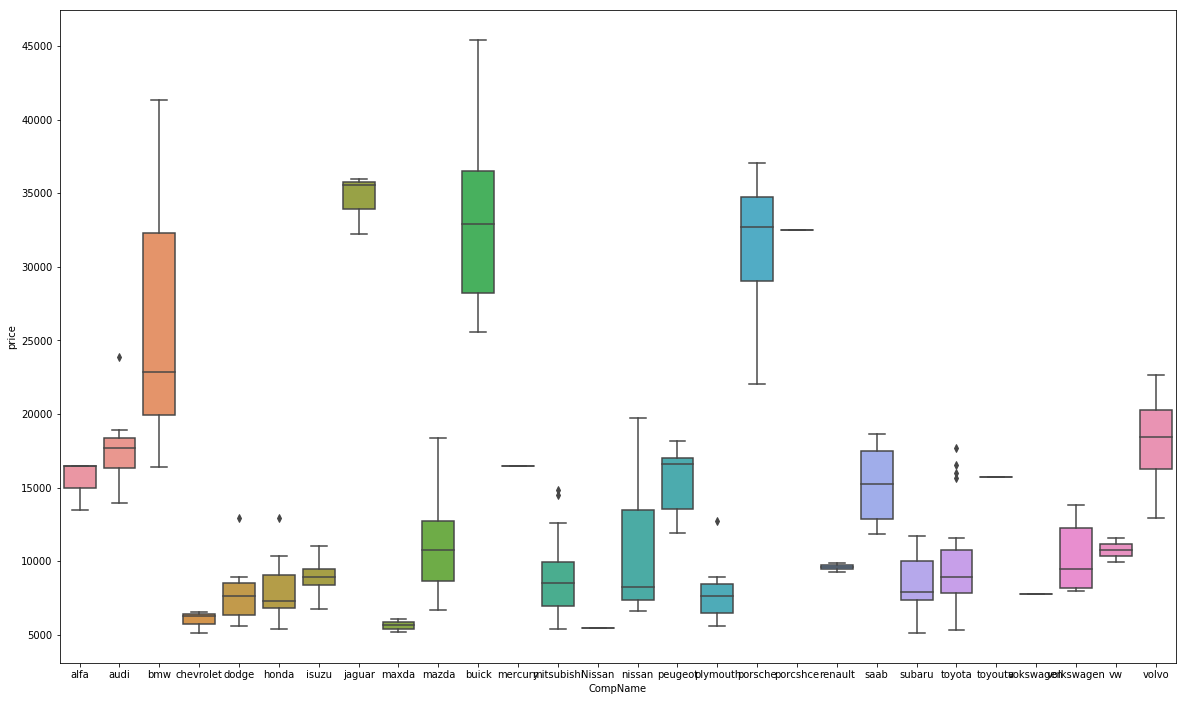

In [314]:
#plot company name seperately
plt.figure(figsize=(20, 12))
sns.boxplot(x = 'CompName', y = 'price', data = cars)
plt.show()

In [315]:
#Dummy variables

In [316]:
# Get the dummy variables for the feature
status = pd.get_dummies(cars[cat_cols],drop_first = True)

# Check what the dataset 'status' looks like
status.head()


,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,CompName_alfa,CompName_audi,CompName_bmw,CompName_buick,CompName_chevrolet,CompName_dodge,...,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,aspiration_turbo,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor
0,0,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,0,1,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
3,0,0,1,0,0,1,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
4,0,0,1,0,0,1,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0


In [317]:
# Drop 'cat_cols' as we have created the dummies for it
cars.drop(['enginelocation',
 'aspiration',
 'drivewheel',
 'CompName',
 'fueltype',
 'carbody',
 'enginetype',
 'fuelsystem'], axis = 1,inplace = True)

cars.head()

,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,2,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,2,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,2,94.5,171.2,65.5,52.4,2823,6,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,4,99.8,176.6,66.2,54.3,2337,4,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,4,99.4,176.6,66.4,54.3,2824,5,136,3.19,3.40,8.0,115,5500,18,22,17450.0


In [318]:
# Add the results to the original housing dataframe
cars = pd.concat([cars, status], axis = 1)

# Now let's see the head of our dataframe.
cars.head()

,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,...,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,aspiration_turbo,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor
0,3,2,88.6,168.8,64.1,48.8,2548,4,130,3.47,...,1,0,0,0,0,0,0,0,0,0
1,3,2,88.6,168.8,64.1,48.8,2548,4,130,3.47,...,1,0,0,0,0,0,0,0,0,0
2,1,2,94.5,171.2,65.5,52.4,2823,6,152,2.68,...,1,0,0,0,0,0,0,0,1,0
3,2,4,99.8,176.6,66.2,54.3,2337,4,109,3.19,...,1,0,0,0,0,0,1,0,0,0
4,2,4,99.4,176.6,66.4,54.3,2824,5,136,3.19,...,1,0,0,0,0,0,1,0,0,0


## Splitting the Data into Training and Testing Sets

In [319]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively

df_train, df_test = train_test_split(cars, train_size = 0.7, test_size = 0.3, random_state = 100)

#### Rescaling the Features

We will use MinMax scaling.

In [320]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [321]:
# Apply scaler() to all the columns except the 'one-two' and 'dummy' variables

df_train[num_cols] = scaler.fit_transform(df_train[num_cols])

df_train.head()

C:\Users\Ajit Shalini\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Ajit Shalini\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,...,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,aspiration_turbo,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor
122,0.6,1.0,0.244828,0.426016,0.291667,0.265487,0.272692,0.2,0.139623,0.230159,...,0,0,0,0,0,0,1,0,0,0
125,1.0,0.0,0.272414,0.452033,0.666667,0.212389,0.500388,0.2,0.339623,1.000000,...,1,0,0,0,0,0,1,0,0,0
166,0.6,0.0,0.272414,0.448780,0.308333,0.424779,0.314973,0.2,0.139623,0.444444,...,1,0,0,0,0,0,0,0,0,0
1,1.0,0.0,0.068966,0.450407,0.316667,0.088496,0.411171,0.2,0.260377,0.626984,...,1,0,0,0,0,0,0,0,0,0
199,0.2,1.0,0.610345,0.775610,0.575000,0.858407,0.647401,0.2,0.260377,0.746032,...,1,0,0,1,0,0,1,0,0,0


#### Dividing into X and Y sets for the model building

In [322]:
y_train = df_train.pop('price')
X_train = df_train

In [323]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 143 entries, 122 to 8
Data columns (total 65 columns):
symboling              143 non-null float64
doornumber             143 non-null float64
wheelbase              143 non-null float64
carlength              143 non-null float64
carwidth               143 non-null float64
carheight              143 non-null float64
curbweight             143 non-null float64
cylindernumber         143 non-null float64
enginesize             143 non-null float64
boreratio              143 non-null float64
stroke                 143 non-null float64
compressionratio       143 non-null float64
horsepower             143 non-null float64
peakrpm                143 non-null float64
citympg                143 non-null float64
highwaympg             143 non-null float64
carbody_hardtop        143 non-null uint8
carbody_hatchback      143 non-null uint8
carbody_sedan          143 non-null uint8
carbody_wagon          143 non-null uint8
CompName_alfa          

#### Building our model
This time, we will be using the LinearRegression function from SciKit Learn for its compatibility with RFE (which is a utility from sklearn)

#### RFE
Recursive feature elimination

In [324]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [325]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 20)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [326]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('symboling', False, 30),
 ('doornumber', False, 38),
 ('wheelbase', False, 8),
 ('carlength', False, 9),
 ('carwidth', True, 1),
 ('carheight', False, 5),
 ('curbweight', True, 1),
 ('cylindernumber', True, 1),
 ('enginesize', True, 1),
 ('boreratio', True, 1),
 ('stroke', True, 1),
 ('compressionratio', True, 1),
 ('horsepower', True, 1),
 ('peakrpm', True, 1),
 ('citympg', False, 11),
 ('highwaympg', False, 22),
 ('carbody_hardtop', False, 14),
 ('carbody_hatchback', False, 13),
 ('carbody_sedan', False, 15),
 ('carbody_wagon', False, 16),
 ('CompName_alfa', False, 21),
 ('CompName_audi', False, 27),
 ('CompName_bmw', True, 1),
 ('CompName_buick', False, 2),
 ('CompName_chevrolet', False, 12),
 ('CompName_dodge', False, 7),
 ('CompName_honda', False, 10),
 ('CompName_isuzu', False, 40),
 ('CompName_jaguar', False, 34),
 ('CompName_maxda', False, 35),
 ('CompName_mazda', False, 25),
 ('CompName_mercury', False, 45),
 ('CompName_mitsubishi', True, 1),
 ('CompName_nissan', False, 36),

In [327]:
col = X_train.columns[rfe.support_]

In [328]:
X_train.columns[~rfe.support_]

Index(['symboling', 'doornumber', 'wheelbase', 'carlength', 'carheight',
       'citympg', 'highwaympg', 'carbody_hardtop', 'carbody_hatchback',
       'carbody_sedan', 'carbody_wagon', 'CompName_alfa', 'CompName_audi',
       'CompName_buick', 'CompName_chevrolet', 'CompName_dodge',
       'CompName_honda', 'CompName_isuzu', 'CompName_jaguar', 'CompName_maxda',
       'CompName_mazda', 'CompName_mercury', 'CompName_nissan',
       'CompName_plymouth', 'CompName_porcshce', 'CompName_renault',
       'CompName_subaru', 'CompName_toyota', 'CompName_toyouta',
       'CompName_vokswagen', 'CompName_volkswagen', 'CompName_volvo',
       'CompName_vw', 'drivewheel_fwd', 'drivewheel_rwd', 'fueltype_gas',
       'fuelsystem_2bbl', 'fuelsystem_4bbl', 'fuelsystem_mfi',
       'fuelsystem_mpfi', 'fuelsystem_spdi', 'fuelsystem_spfi',
       'enginetype_ohc', 'enginetype_ohcf', 'enginetype_ohcv'],
      dtype='object')

Building model using statsmodel, for the detailed statistics


In [329]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [330]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train = sm.add_constant(X_train_rfe)

In [331]:
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [332]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.975
Model:                            OLS   Adj. R-squared:                  0.970
Method:                 Least Squares   F-statistic:                     236.2
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           4.16e-88
Time:                        18:01:53   Log-Likelihood:                 228.61
No. Observations:                 143   AIC:                            -417.2
Df Residuals:                     123   BIC:                            -358.0
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
carwidth                0.3521    

In [333]:
X_train_new = X_train.drop(['const'], axis=1)

In [334]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,compressionratio,144.60
15,fuelsystem_idi,111.04
3,enginesize,97.43
2,cylindernumber,60.11
1,curbweight,57.61
7,horsepower,47.29
0,carwidth,40.31
4,boreratio,17.13
5,stroke,14.88
8,peakrpm,12.36


In [335]:
#droping variables as it has high p-value and vif(giving more prefenrence to p-value)
X_train_new = X_train_new.drop(['compressionratio'], axis=1)

In [336]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

In [337]:
lm = sm.OLS(y_train,X_train_lm).fit() 

In [338]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.942
Method:                 Least Squares   F-statistic:                     123.0
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           1.58e-70
Time:                        18:01:53   Log-Likelihood:                 231.15
No. Observations:                 143   AIC:                            -422.3
Df Residuals:                     123   BIC:                            -363.1
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1403    

In [339]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,enginesize,83.39
1,curbweight,57.57
6,horsepower,46.43
0,carwidth,40.19
2,cylindernumber,27.08
5,stroke,13.58
7,peakrpm,11.82
4,boreratio,11.16
10,CompName_peugeot,10.35
17,enginetype_l,9.44


In [340]:
#droping variables as it has high p-value and vif(giving more prefenrence to p-value)

X_train_new = X_train_new.drop(['fuelsystem_idi'], axis=1)

In [341]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

In [342]:
lm = sm.OLS(y_train,X_train_lm).fit() 

In [343]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.943
Method:                 Least Squares   F-statistic:                     130.8
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           1.40e-71
Time:                        18:01:54   Log-Likelihood:                 231.11
No. Observations:                 143   AIC:                            -424.2
Df Residuals:                     124   BIC:                            -367.9
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1394    

In [344]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,enginesize,77.42
1,curbweight,56.68
0,carwidth,40.14
6,horsepower,33.17
2,cylindernumber,27.06
5,stroke,13.34
7,peakrpm,11.58
4,boreratio,10.97
10,CompName_peugeot,10.35
16,enginetype_l,9.43


In [345]:
X_train_new = X_train_new.drop(['CompName_saab'], axis=1)

In [346]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.941
Method:                 Least Squares   F-statistic:                     134.3
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           1.17e-71
Time:                        18:01:54   Log-Likelihood:                 228.46
No. Observations:                 143   AIC:                            -420.9
Df Residuals:                     125   BIC:                            -367.6
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1339    

In [347]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,enginesize,74.79
1,curbweight,56.28
0,carwidth,40.12
6,horsepower,31.67
2,cylindernumber,26.97
5,stroke,13.34
7,peakrpm,11.57
4,boreratio,10.74
10,CompName_peugeot,10.33
15,enginetype_l,9.43


In [348]:
#Though VIF of enginesize is high(as the r-square is getting less with removing engine size, I am going with curb weight)
X_train_new = X_train_new.drop(['curbweight'], axis=1)

In [349]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.944
Model:                            OLS   Adj. R-squared:                  0.937
Method:                 Least Squares   F-statistic:                     133.3
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           8.75e-71
Time:                        18:01:54   Log-Likelihood:                 223.30
No. Observations:                 143   AIC:                            -412.6
Df Residuals:                     126   BIC:                            -362.2
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1982    

In [350]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,enginesize,63.63
5,horsepower,30.77
0,carwidth,29.19
1,cylindernumber,26.48
4,stroke,13.33
6,peakrpm,11.53
3,boreratio,10.42
9,CompName_peugeot,10.19
14,enginetype_l,9.43
10,CompName_porsche,3.35


In [351]:
#As horsepower has intersection of high p-value and VIF
X_train_new = X_train_new.drop(['horsepower'], axis=1)

In [352]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.935
Method:                 Least Squares   F-statistic:                     136.5
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           1.26e-70
Time:                        18:01:55   Log-Likelihood:                 220.06
No. Observations:                 143   AIC:                            -408.1
Df Residuals:                     127   BIC:                            -360.7
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.2144    

In [353]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,carwidth,29.07
1,cylindernumber,25.87
2,enginesize,25.79
3,boreratio,10.29
8,CompName_peugeot,10.15
4,stroke,10.02
13,enginetype_l,9.43
5,peakrpm,7.16
9,CompName_porsche,3.32
10,enginelocation_rear,2.17


In [354]:
X_train_new = X_train_new.drop(['peakrpm'], axis=1)

In [355]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.940
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                     142.9
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           6.67e-71
Time:                        18:01:55   Log-Likelihood:                 217.94
No. Observations:                 143   AIC:                            -405.9
Df Residuals:                     128   BIC:                            -361.4
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.2402    

In [356]:
X_train_new = X_train_new.drop(['enginetype_l'], axis=1)

In [357]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.932
Method:                 Least Squares   F-statistic:                     149.7
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           4.45e-71
Time:                        18:01:55   Log-Likelihood:                 215.56
No. Observations:                 143   AIC:                            -403.1
Df Residuals:                     129   BIC:                            -361.6
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.2672    

In [358]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,carwidth,28.02
1,cylindernumber,18.89
2,enginesize,17.57
3,boreratio,9.82
4,stroke,8.07
8,CompName_porsche,3.26
9,enginelocation_rear,2.16
11,enginetype_dohcv,2.14
10,aspiration_turbo,1.69
7,CompName_peugeot,1.39


In [359]:
#As cylindernumber and engine size are highly correlated than carwidth in our correlation matrix going with cylinder number
X_train_new = X_train_new.drop(['cylindernumber'], axis=1)

In [360]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.910
Method:                 Least Squares   F-statistic:                     120.6
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           2.78e-64
Time:                        18:01:56   Log-Likelihood:                 195.40
No. Observations:                 143   AIC:                            -364.8
Df Residuals:                     130   BIC:                            -326.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.1058    

In [361]:
X_train_new = X_train_new.drop(['stroke'], axis=1)

In [362]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.914
Model:                            OLS   Adj. R-squared:                  0.907
Method:                 Least Squares   F-statistic:                     127.2
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           2.76e-64
Time:                        18:01:56   Log-Likelihood:                 192.70
No. Observations:                 143   AIC:                            -361.4
Df Residuals:                     131   BIC:                            -325.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.1533    

In [363]:
X_train_new = X_train_new.drop(['enginetype_dohcv'], axis=1)


In [364]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.914
Model:                            OLS   Adj. R-squared:                  0.908
Method:                 Least Squares   F-statistic:                     140.8
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           2.41e-65
Time:                        18:01:56   Log-Likelihood:                 192.63
No. Observations:                 143   AIC:                            -363.3
Df Residuals:                     132   BIC:                            -330.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.1529    

In [365]:
X_train_new = X_train_new.drop(['boreratio'], axis=1)


In [366]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.906
Method:                 Least Squares   F-statistic:                     153.1
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           1.10e-65
Time:                        18:01:56   Log-Likelihood:                 190.71
No. Observations:                 143   AIC:                            -361.4
Df Residuals:                     133   BIC:                            -331.8
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.1701    

In [367]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,carwidth,11.70
1,enginesize,10.58
7,aspiration_turbo,1.61
5,CompName_porsche,1.60
6,enginelocation_rear,1.60
4,CompName_peugeot,1.24
8,enginetype_rotor,1.20
2,CompName_bmw,1.15
3,CompName_mitsubishi,1.15


In [368]:
X_train_new = X_train_new.drop(['CompName_porsche'], axis=1)

In [369]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.909
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     167.4
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           7.29e-66
Time:                        18:01:57   Log-Likelihood:                 188.35
No. Observations:                 143   AIC:                            -358.7
Df Residuals:                     134   BIC:                            -332.0
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.1780    

In [370]:
X_train_new = X_train_new.drop(['CompName_peugeot'], axis=1)

In [2]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()
#Let's see the summary of our linear model
print(lm.summary())

NameError: name 'X_train_new' is not defined

In [372]:
X_train_new = X_train_new.drop(['CompName_mitsubishi'], axis=1)

In [373]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.896
Model:                            OLS   Adj. R-squared:                  0.892
Method:                 Least Squares   F-statistic:                     195.6
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           2.52e-64
Time:                        18:01:57   Log-Likelihood:                 178.89
No. Observations:                 143   AIC:                            -343.8
Df Residuals:                     136   BIC:                            -323.0
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.1807    

In [374]:
X_train_new = X_train_new.drop(['aspiration_turbo'], axis=1)

In [375]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.891
Model:                            OLS   Adj. R-squared:                  0.887
Method:                 Least Squares   F-statistic:                     224.4
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           3.81e-64
Time:                        18:01:57   Log-Likelihood:                 175.54
No. Observations:                 143   AIC:                            -339.1
Df Residuals:                     137   BIC:                            -321.3
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.1870    

## Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [376]:
y_train_price = lm.predict(X_train_lm)

C:\Users\Ajit Shalini\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,0,'Errors')

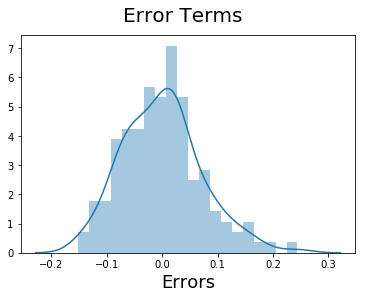

In [377]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)

Making Predictions

#### Applying the scaling on the test sets

In [378]:
df_test[num_cols] = scaler.transform(df_test[num_cols])

C:\Users\Ajit Shalini\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Ajit Shalini\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [379]:
y_test = df_test.pop('price')
X_test = df_test

In [380]:
# Now let's use our model to make predictions.


# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [381]:
# Making predictions
y_pred = lm.predict(X_test_new)

In [382]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9004517106020922

#Model Evaluation

Text(0,0.5,'y_pred')

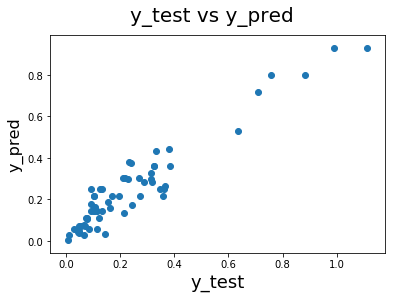

In [383]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16) 

In [384]:
lm.params

const                 -0.186991
carwidth               0.460619
enginesize             0.727802
CompName_bmw           0.244664
enginelocation_rear    0.439993
enginetype_rotor       0.166434
dtype: float64

We can see that the equation of our best fitted line is:
    
price =    carwidth*0.460619+enginesize*0.727802+CompName_bmw*0.244664+enginelocation_rear*0.439993+
            enginetype_rotor*0.166434-const*0.186991

In [385]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9004517106020922